It seems like Weinan has used pfjet branches in ff ntuples to store LJ information. This notebook explores the pfjet and ljsource branches to understand the available information.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
#plotting
import matplotlib.pyplot as plt
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/studies/../../analysis/tools/sidm_processor.py'>

Start with "standard" 2mu2e sample. First just look at which pfjet branches are available.

In [2]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset" : sample_name, 
    },
).events()
ak.fields(events.pfjet)

['chargedHadronE',
 'neutralHadronE',
 'chargedEmE',
 'neutralEmE',
 'photonE',
 'electronE',
 'muonE',
 'hfHadronE',
 'hfEmE',
 'charged_n',
 'neutral_n',
 'chargedHadron_n',
 'neutralHadron_n',
 'photon_n',
 'electron_n',
 'muon_n',
 'area',
 'maxDistance',
 'pfIsolationNoPU05',
 'neuIsolationNoPU05',
 'hadIsolationNoPU05',
 'pfIsolation05',
 'neuIsolation05',
 'hadIsolation05',
 'tkPtSum05',
 'tkPtRawSum05',
 'tkIsolation05',
 'pfIsolationPtNoPU05',
 'pfIsolationPt05',
 'pfIsolationNoPU07',
 'neuIsolationNoPU07',
 'hadIsolationNoPU07',
 'pfIsolation07',
 'neuIsolation07',
 'hadIsolation07',
 'tkPtSum07',
 'tkPtRawSum07',
 'tkIsolation07',
 'pfIsolationPtNoPU07',
 'pfIsolationPt07',
 'tracks_n',
 'ptDistribution',
 'dRSpread',
 'pfiso',
 'mindr',
 'cleaned',
 'averagevtx',
 'medianvtx',
 'p4',
 'klmvtx',
 'pfcands',
 'kinvtx',
 'pfcand']

Next add some pfjet hists and process sample.

In [3]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
fileset = {
    sample_name: [
        sample_file,
    ],
}

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e",
    ],
    ["base"]
)

output = runner(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Plot some pfjet quantities; compare with lj quantities when possible

In [4]:
hists = output[sample_name]["hists"]

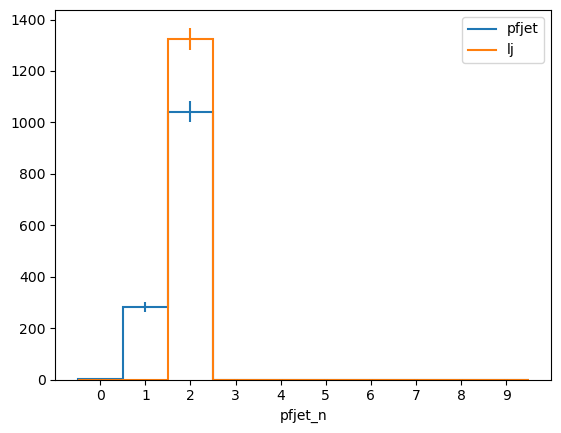

In [5]:
hists["pfjet_n"]["2mu2e", :].plot1d()
hists["lj_n"]["2mu2e", :].plot1d()
plt.legend(["pfjet", "lj"])

Hmm, more ljs than pfjets

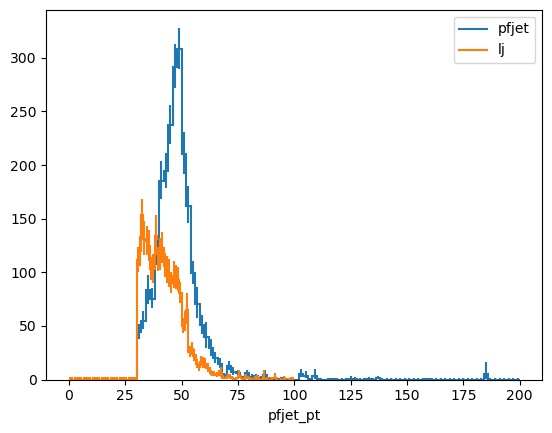

In [6]:
hists["pfjet_pt"]["2mu2e", :].plot1d()
hists["lj_pt_type"]["2mu2e", :, :].project("lj_pt").plot1d()
plt.legend(["pfjet", "lj"])

But pjets appear to reconstruct the dark photon pt more reliably than ljs

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad19d1a670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

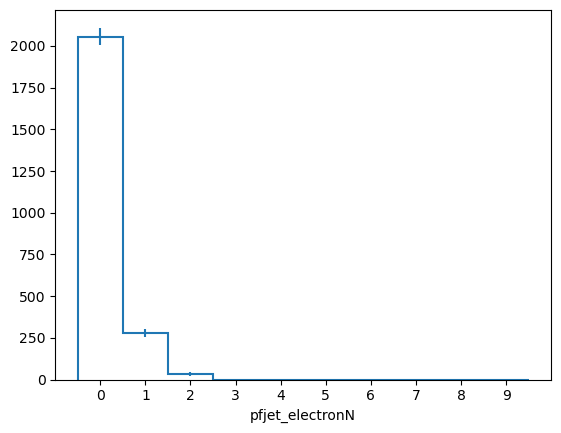

In [7]:
hists["pfjet_electronN"]["2mu2e", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb11c70b400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

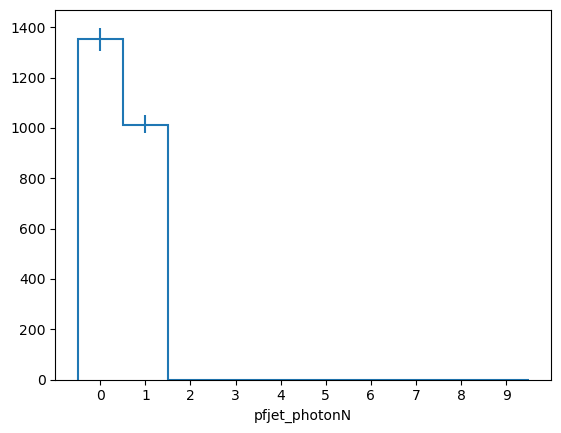

In [8]:
hists["pfjet_photonN"]["2mu2e", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad19bab190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

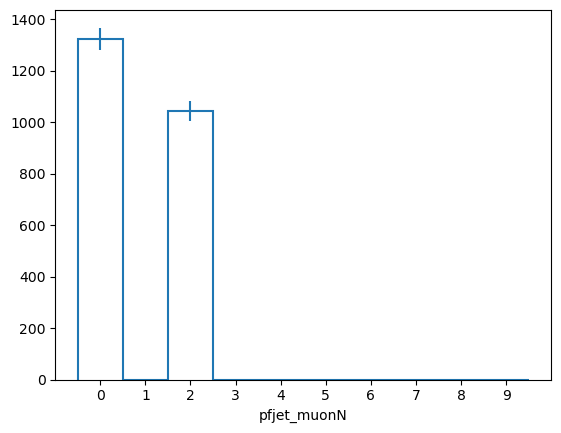

In [9]:
hists["pfjet_muonN"]["2mu2e", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad19aeb8b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

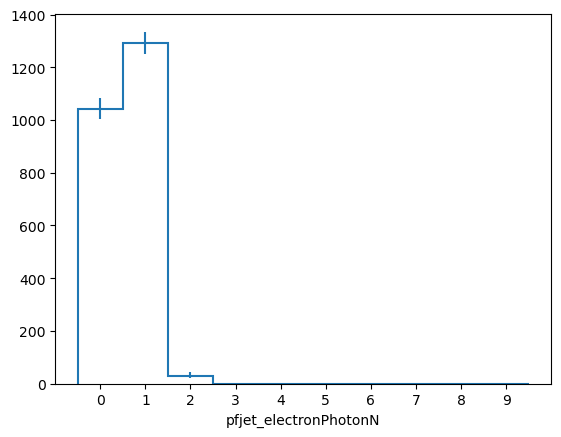

In [10]:
hists["pfjet_electronPhotonN"]["2mu2e", :].plot1d()

Number of electrons, photons, and muons in pfjets seems ballpark reasonable if one remembers that most ljs in this particular sample contain either 2 reco muons or 1 reco photon